In [23]:
import math
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
#plt.style.use('dark_background')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

!pip install yfinance
import yfinance as yf
from datetime import datetime

yf.pdr_override()

start='2022-01-01'
end=datetime.now()

df = pdr.get_data_yahoo('AAPL', start, end)
# Show the data
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683853,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390686,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645538,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746796,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915573,86709100


[*********************100%***********************]  1 of 1 completed


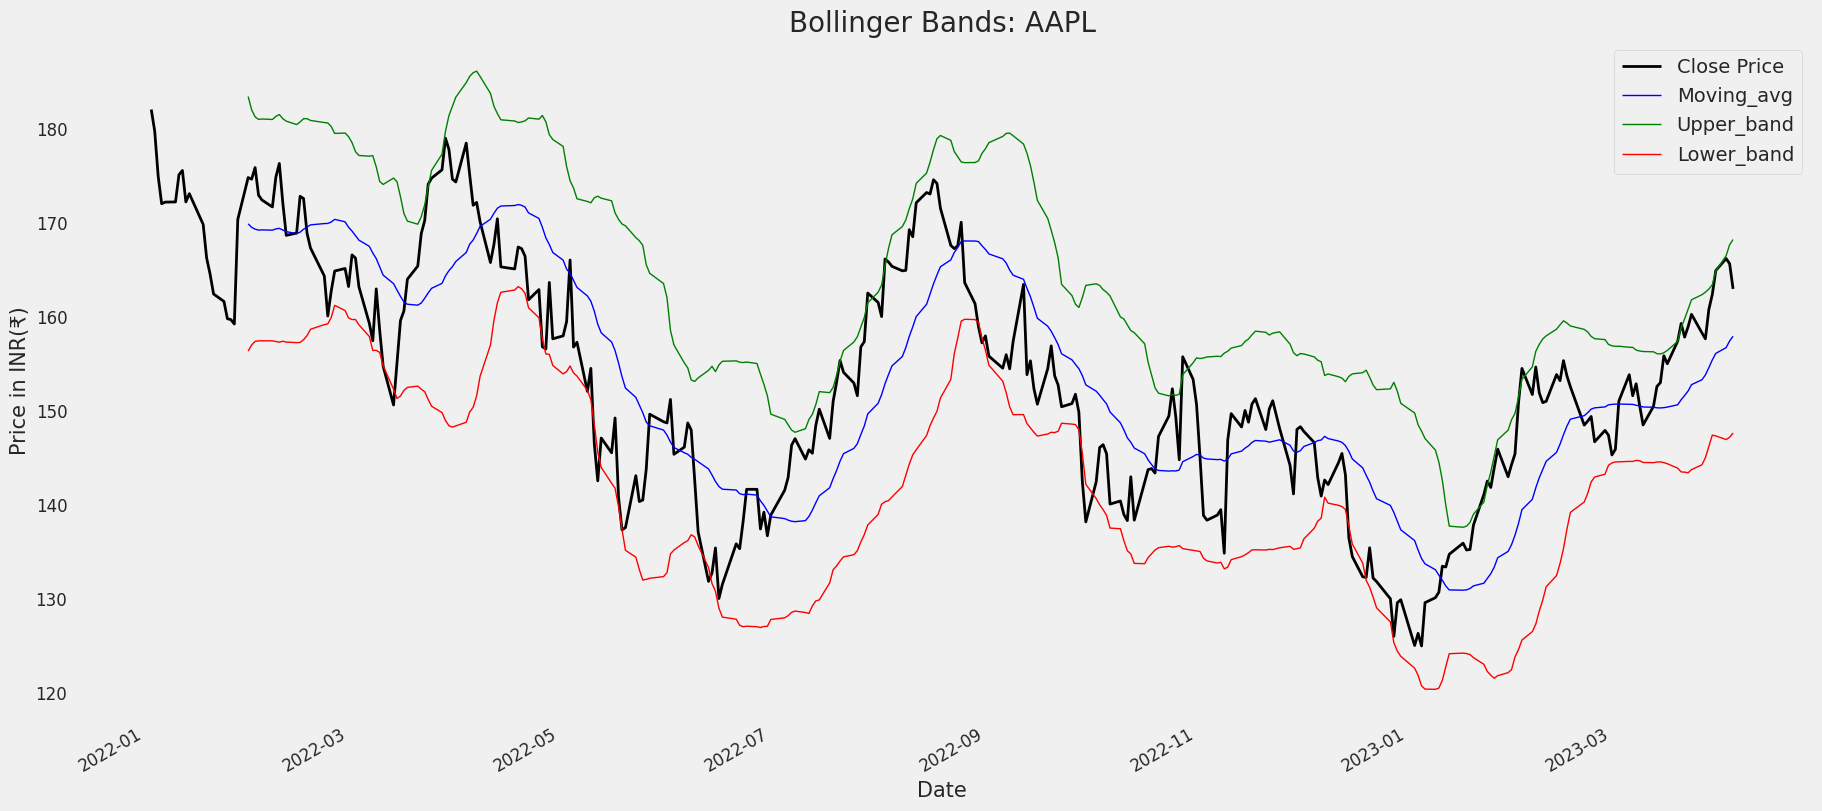

In [28]:
def plot_bollinger_bands(stock_symbol, start_date, end_date, MA_period = 20, num_stdev = 2):
    '''
    stock_symbol:  (str)stock ticker as on Yahoo finance. Eg: 'ULTRACEMCO.NS' 
    start_date:    (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    end_date:      (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    MA_period:     (int)moving average window period (Usually we take 20).
    num_stdev:     (int)number of standard deviations (Most commonly 2 std devs are considerd). 
    
    '''
    stock_df = pdr.get_data_yahoo(stock_symbol, start = start_date, end = end_date)['Close']
    stock_df = pd.DataFrame(stock_df)
    stock_df.columns = {'Close Price'} 
    stock_df.dropna(axis = 0, inplace = True) 
    
    # compute the datapoints for moving average, upper band and the lower band
    def bollinger_band(price, MA_period, num_stdev):
        mean_price = price.rolling(MA_period).mean()
        stdev = price.rolling(MA_period).std()
        upband = mean_price + num_stdev*stdev
        dwnband = mean_price - num_stdev*stdev
        return np.round(mean_price, 3), np.round(upband, 3), np.round(dwnband, 3)

    stock_df['Moving_avg'], stock_df['Upper_band'], stock_df['Lower_band'] = bollinger_band(stock_df['Close Price'], 
                                                                                            MA_period, num_stdev)
    
    # plotting and visualization of bollinger bands
    stock_df['Close Price'].plot(c = 'k', figsize = (20,10), lw = 2, fontsize = 12)
    stock_df['Moving_avg'].plot(c = 'b', figsize = (20, 10), lw = 1)
    stock_df['Upper_band'].plot(c = 'g', figsize = (20, 10), lw = 1) 
    stock_df['Lower_band'].plot(c = 'r', figsize = (20, 10), lw = 1)

    # show plot
    plt.title('Bollinger Bands: {}'.format(stock_symbol), fontsize = 20)
    plt.ylabel('Price in INR(₹)',fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.legend()
    plt.grid()
    plt.show()

plot_bollinger_bands('AAPL', start, end, MA_period = 20, num_stdev = 2)

high Array size 316
low Array size 316
open Array size 316
close Array size 316
[182.88000488 182.94000244 180.16999817 175.30000305 174.13999939
 172.5        175.17999268 177.17999268 176.61999512 173.77999878
 172.53999329 171.08000183 169.67999268 166.33000183 162.30000305
 162.75999451 164.38999939 163.83999634 170.3500061  175.
 174.83999634 175.88000488 176.24000549 174.1000061  173.94999695
 175.3500061  176.6499939  175.47999573 173.08000183 169.58000183
 172.94999695 173.33999634 171.91000366 170.53999329 166.69000244
 166.1499939  162.8500061  165.11999512 165.41999817 166.6000061
 167.36000061 168.91000366 165.55000305 165.02000427 162.88000488
 163.41000366 160.38999939 159.27999878 154.11999512 155.57000732
 160.         161.         164.47999573 166.3500061  169.41999817
 172.63999939 174.13999939 175.27999878 175.72999573 179.00999451
 179.61000061 178.02999878 174.88000488 178.49000549 178.30000305
 173.63000488 173.36000061 171.77999878 169.02999878 169.86999512
 171.

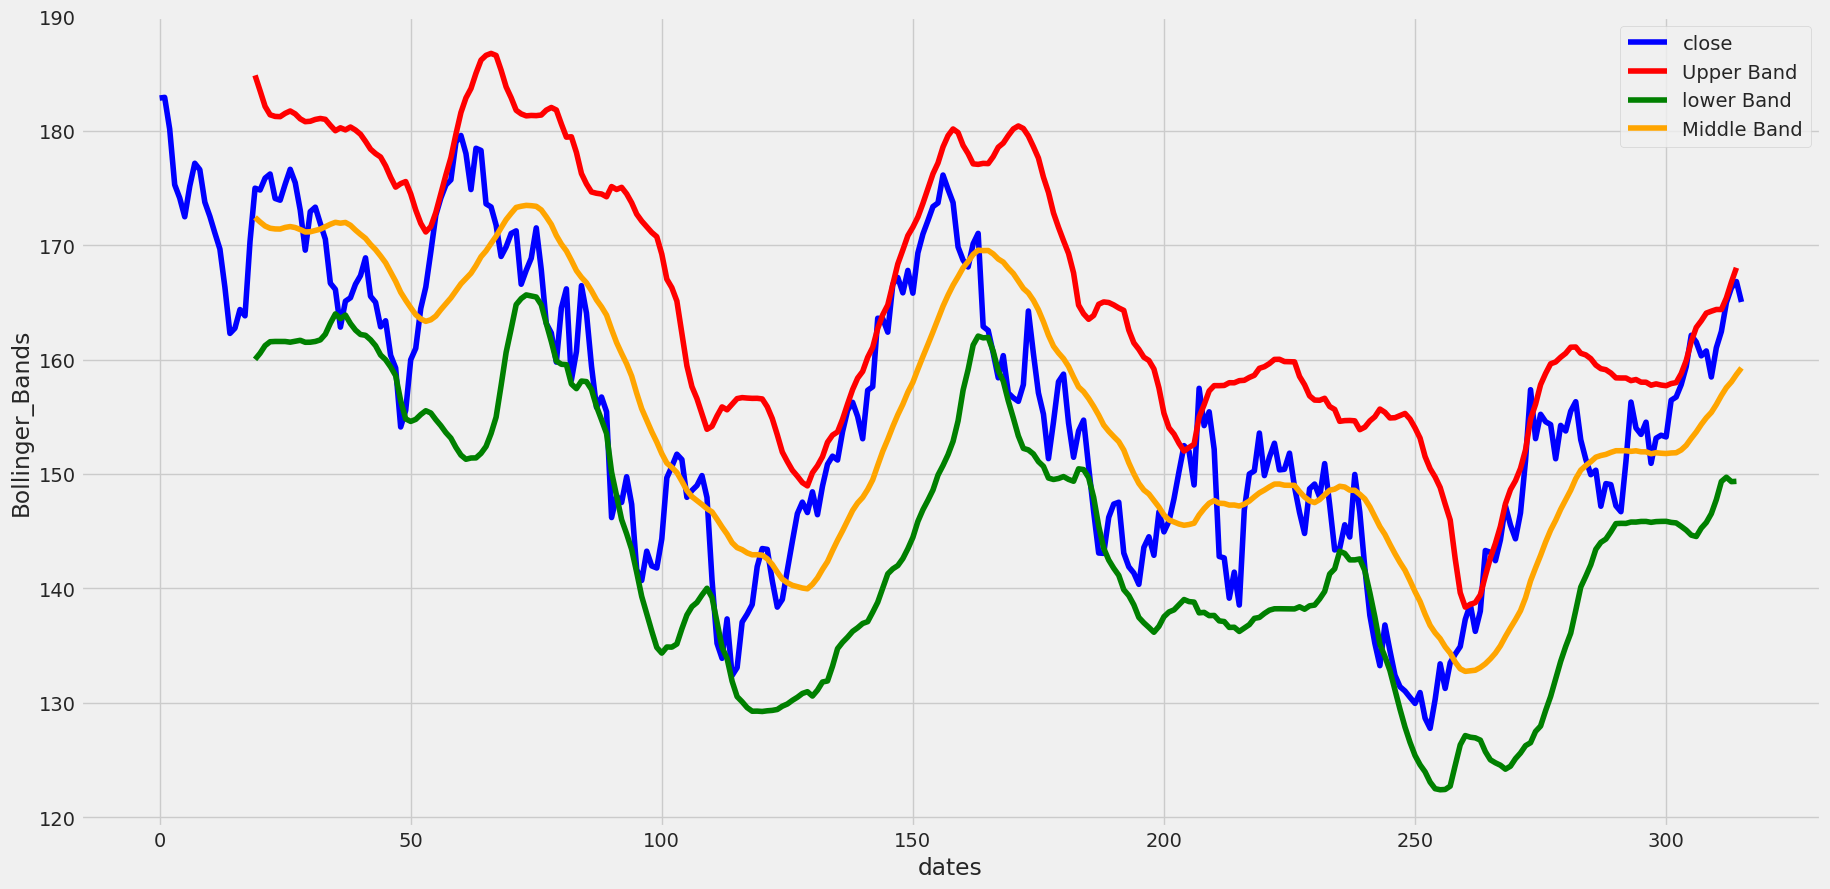

In [29]:
df.columns = ['Date', 'Close', 'Open', 'High', 'Low', 'Volume']
df.set_index('Date', inplace=True, drop=False)

array_date = np.array(df['Date'])
array_close = np.array(df['Close'])
array_open = np.array(df['Open'])
array_high = np.array(df['High'])
array_low = np.array(df['Low'])
print("high Array size",array_high.size)
print("low Array size",array_low.size)
print("open Array size",array_open.size)
print("close Array size",array_close.size)
print(array_close)
Bperiods=19
y=0
array_Middleband=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_close[y]
		sum=sum+z
		y=y+1
	print(sum)
	sum=sum/20
	print(sum)
	array_Middleband.append(sum)
	y=y-(Bperiods)
print(len(array_Middleband))
print(array_Middleband)
stndrd_deviation=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
y=0
z=0
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_Middleband[x+Bperiods]
		sum=sum+((z-array_close[y])*(z-array_close[y]))
		y=y+1
	print(sum)
	sum=sum/19
	sum=math.sqrt(sum)
	print(sum)
	stndrd_deviation.append(sum)
	y=y-(Bperiods)
print(len(stndrd_deviation))
print(stndrd_deviation)
upper_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
lower_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(Bperiods,len(stndrd_deviation)-1):
	upper_band.append(array_Middleband[x]+(2*stndrd_deviation[x]))
	lower_band.append(array_Middleband[x]-(2*stndrd_deviation[x]))
print(upper_band)
print(len(upper_band))
print(lower_band)
plt.plot(array_close,color='blue',label = 'close')
plt.plot(upper_band,color='red',label = 'Upper Band')
plt.plot(lower_band,color='green',label = 'lower Band')
plt.plot(array_Middleband,color='orange',label = 'Middle Band')
labels = array_date[0:]
plt.ylabel('Bollinger_Bands')
plt.xlabel('dates')
plt.legend()
plt.show()